In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
from gmsm.datamodules.dataloader import UnivariateDataloader
from gmsm.validation.msm import MSMValidator
from gmsm.modules.msm import MSM

In [2]:
root = Path().resolve().parent
data_path = root / 'data' / 'sp500_1min_2003.csv'
df = pd.read_csv(data_path, index_col=1)

In [4]:
dataloader = UnivariateDataloader(df)
returns = dataloader.get_raw_returns_array()

In [6]:
emp_vol_ann = returns.std() * np.sqrt(390 * 252)
custom_para0 = [1.3, 2.0, 0.8, emp_vol_ann]
model = MSM(returns, kbar=2, n_vol=390*252, para0=custom_para0)


Starting optimization...
Optimization finished: Success=True, Message=CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH


In [7]:
model.summary()

****************************************************************************
  Markov Switching Multifractal Model (MSM) - kbar=2
****************************************************************************
  Log-Likelihood: 1196258.1491
  Observations:   175083
  Optimization:   Converged=True, Iterations=10
----------------------------------------------------------------------------
                  Estimate  Std Error    t-value  p-value
m0                  1.7379     0.0012 1,469.0544   0.0000
b                  32.0292     1.4550    22.0125   0.0000
gammak              0.2995     0.0048    61.8315   0.0000
sigma_annualized    0.1290     0.0002   517.3837   0.0000
----------------------------------------------------------------------------


,Estimate,Std Error,t-value,p-value
m0,1.737925,0.001183,1469.054396,0.0
b,32.029205,1.455048,22.012471,0.0
gammak,0.299514,0.004844,61.831544,0.0
sigma_annualized,0.129021,0.000249,517.383681,0.0


In [9]:
val = MSMValidator(model, dataloader.get_dataframe(), return_col='log_return')


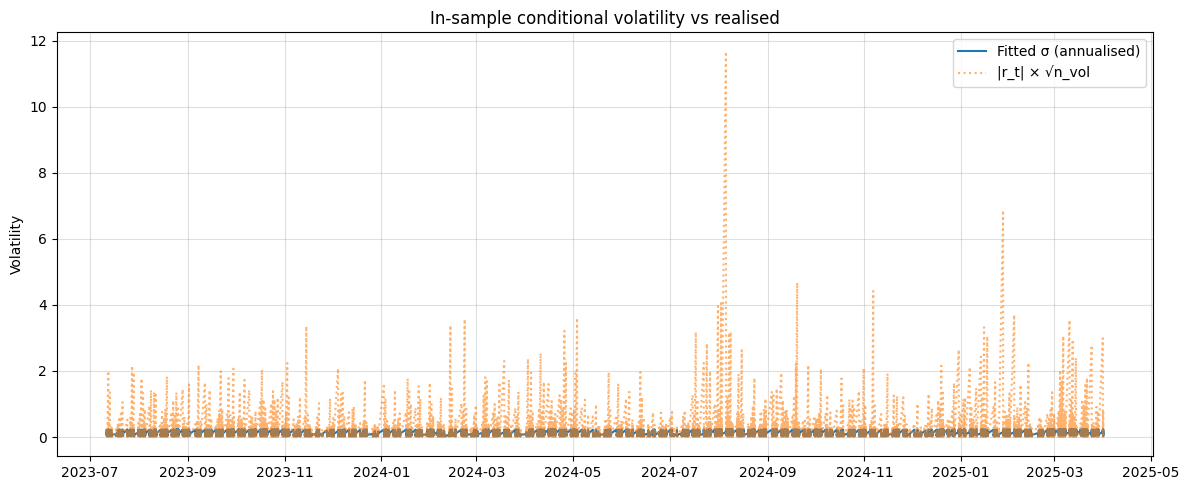

In [10]:
val.plot_fitted()

In [11]:
print('In-sample:',   val.in_sample_metrics())
print('Forecast  :',  val.forecast_metrics())

In-sample: {'MSE_var': np.float64(0.1451372191924171), 'RMSE_var': np.float64(0.3809687903128248), 'MAE_var': np.float64(0.013164978018217869), 'MSE_vol': np.float64(0.007545861780679342), 'RMSE_vol': np.float64(0.08686691994470244), 'MAE_vol': np.float64(0.044952051748446464), 'QLIKE': np.float64(inf)}
Forecast  : {'MSE_var': np.float64(0.1455750163895799), 'RMSE_var': np.float64(0.38154294173733566), 'MAE_var': np.float64(0.01646998239484416), 'MSE_vol': np.float64(0.010378724917373341), 'RMSE_vol': np.float64(0.10187602719665378), 'MAE_vol': np.float64(0.06066951944324675), 'QLIKE': np.float64(inf)}


/Users/gregruyoga/gmoneycodes/gmsm/gmsm/validation/msm.py:97: RuntimeWarning: divide by zero encountered in log
  return np.mean(ratio - np.log(ratio) - 1.0)
